# Usability Only
This notebook contains analyses restricted to only usability questions.

In [1]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
import scipy.stats
import numpy as np

#Here are the SUS questions on our input data set
sus_qs = ['Ease of Use (SUS)-I think that I would like to use this application frequently.',
       'Ease of Use (SUS)-I found the application unnecessarily complex.',
       'Ease of Use (SUS)-I thought the application was easy to use.',
       'Ease of Use (SUS)-I think that I would need the support of a technical person to be able to use this application.',
       'Ease of Use (SUS)-I found the various functions in the application were well integrated.',
       'Ease of Use (SUS)-I thought there was too much inconsistency in this application.',
       'Ease of Use (SUS)-I would imagine that most people would learn to use this application very quickly.',
       'Ease of Use (SUS)-I found the application very cumbersome to use.',
       'Ease of Use (SUS)-I felt very confident using the application.',
       'Ease of Use (SUS)-I needed to learn a lot of things before I could get going with this application.']
nasa_qs = ['Cognitive Workload (NASA-TLX)-How mentally demanding was the task?',
           'Cognitive Workload (NASA-TLX)-How much time pressure did you feel?',
           'Cognitive Workload (NASA-TLX)-How hard did you have to work to accomplish your level of performance?',
           'Cognitive Workload (NASA-TLX)-How insecure, discouraged, irritated, stressed, and annoyed were you?',
           'Cognitive Workload (NASA-TLX)-How successful were you in accomplishing what you were asked to do?']
user_qs = ['User Satisfaction-I believe this medication display would help improve my ability to manage patients’  medications.',
             'User Satisfaction-I believe this medication display would aid me in providing a better treatment regimen for my patients.',
             'User Satisfaction-I believe this medication display would improve patient outcomes.']

main_cohort = pd.read_csv('./data/01_filtered_combined.csv') 
main_cohort_c = main_cohort[main_cohort['trt']=='control']
main_cohort_i = main_cohort[main_cohort['trt']=='intervention']

## SUS Composite Scoring
SUS stands for system usability score. Using this site as a reference, we implement the SUS score for each individual and then look at a histogram of the SUS scores to determine an appropriate method for inference.

In [5]:

#Implement the SUS algorithm on the listwise-deleted data (see above load data section)
#calculating the SUS score
def scoreResult(x):
    if x=='Strongly disagree':
        return(1)
    elif x=='Somewhat disagree':
        return(2)
    elif x=='Neither agree nor disagree':
        return(3)
    elif x=='Somewhat agree':
        return(4)
    elif x=='Strongly agree':
        return(5)       
def even_correct(x):
    return(5-x)
def odd_correct(x):
    return(x-1)
def susIt(x):
    temp = [scoreResult(y) for y in x]
    temp_correct = [even_correct(y) if (y % 2 ==0) else odd_correct(y) for y in temp]
    result = np.sum(temp_correct)*2.5
    return(result)
us_control_sus = main_cohort_c[sus_qs]
us_interve_sus = main_cohort_i[sus_qs]
sus_control = pd.Series(us_control_sus.apply(susIt,axis=1))
sus_interve = pd.Series(us_interve_sus.apply(susIt,axis=1))

print("SUS 5 point summary in control group is: ")
print("**********************************************")
print(sus_control.describe())
print("\n")
print("SUS 5 point summary in intervention group is: ")
print("**********************************************")
print(sus_interve.describe())

SUS 5 point summary in control group is: 
**********************************************
count    10.000000
mean     40.750000
std      10.478152
min      17.500000
25%      38.750000
50%      45.000000
75%      47.500000
max      50.000000
dtype: float64


SUS 5 point summary in intervention group is: 
**********************************************
count    15.000000
mean     48.500000
std      13.784049
min      20.000000
25%      41.250000
50%      47.500000
75%      55.000000
max      75.000000
dtype: float64


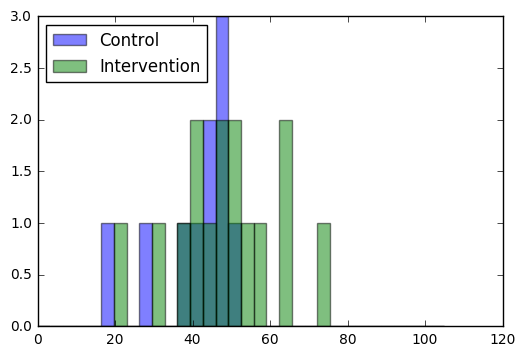

In [6]:
x = sus_control
y = sus_interve

bins = np.linspace(0, 105, 33)

plt.hist(x, bins, alpha=0.5, label='Control')
plt.hist(y, bins, alpha=0.5, label='Intervention')
plt.legend(loc='upper left')
plt.show()

In [8]:
import scipy.stats

print("Student's t-test restuls: \n*************************************************")
print(scipy.stats.ttest_ind(x,y))

Student's t-test restuls: 
*************************************************
Ttest_indResult(statistic=-1.5073232233466802, pvalue=0.14534127955955994)


## NASA-TLX Composite Scoring Difference

In [ ]:
#Calculating the NASA-TLX
def vh(x):
    if x=='Very low':
        return(1*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat low':
        return(2*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Neutral':
        return(3*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat high':
        return(4*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Very high':
        return(5*4) #Note this is 1*4 - I'm equally weighting all questions by 4
def vl(x):
    if x=='Very low':
        return(5*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat low':
        return(4*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Neutral':
        return(3*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat high':
        return(2*4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Very high':
        return(1*4) #Note this is 1*4 - I'm equally weighting all questions by 4

us_control_nasa = main_cohort_c[nasa_qs]
us_interve_nasa = main_cohort_i[nasa_qs]
    
nasa_control = us_control_nasa.apply(lambda row: np.sum([vl(row['Cognitive Workload (NASA-TLX)-How mentally demanding was the task?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How much time pressure did you feel?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How hard did you have to work to accomplish your level of performance?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How insecure, discouraged, irritated, stressed, and annoyed were you?']),
                                          vh(row['Cognitive Workload (NASA-TLX)-How successful were you in accomplishing what you were asked to do?'])
                                          ]),
                                     axis=1)

nasa_interve = us_interve_nasa.apply(lambda row: np.sum([vl(row['Cognitive Workload (NASA-TLX)-How mentally demanding was the task?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How much time pressure did you feel?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How hard did you have to work to accomplish your level of performance?']),
                                          vl(row['Cognitive Workload (NASA-TLX)-How insecure, discouraged, irritated, stressed, and annoyed were you?']),
                                          vh(row['Cognitive Workload (NASA-TLX)-How successful were you in accomplishing what you were asked to do?'])
                                          ]),
                                     axis=1)

print("NASA 5 point summary in control group is: ")
print("**********************************************")
print(nasa_control.describe())
print("\n")
print("NASA 5 point summary in intervention group is: ")
print("**********************************************")
print(nasa_interve.describe())

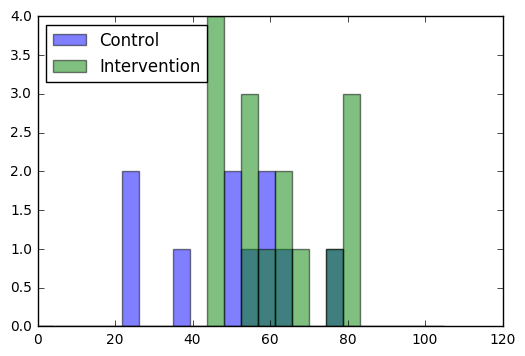

In [10]:

x = nasa_control
y = nasa_interve

bins = np.linspace(0, 105, 25)

plt.hist(x, bins, alpha=0.5, label='Control')
plt.hist(y, bins, alpha=0.5, label='Intervention')
plt.legend(loc='upper left')
plt.show()

In [11]:
print("Student's t-test restuls: \n*************************************************")
print(scipy.stats.ttest_ind(x,y))

Student's t-test restuls: 
*************************************************
Ttest_indResult(statistic=-1.9957020007630728, pvalue=0.057941731184653365)


## User Satisfaction

In [12]:

def vh_user(x):
    if x=='Strongly disagree':
        return(1) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat disagree':
        return(2) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Neither agree nor disagree':
        return(3) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Somewhat agree':
        return(4) #Note this is 1*4 - I'm equally weighting all questions by 4
    elif x=='Strongly agree':
        return(5) #Note this is 1*4 - I'm equally weighting all questions by 4

us_control_user = main_cohort_c[user_qs]
us_interve_user = main_cohort_i[user_qs]
    
user_control = us_control_user.apply(lambda row: np.sum([vh_user(row['User Satisfaction-I believe this medication display would help improve my ability to manage patients’  medications.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would aid me in providing a better treatment regimen for my patients.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would improve patient outcomes.'])
                                          ]),
                                     axis=1)
user_interve = us_interve_user.apply(lambda row: np.sum([vh_user(row['User Satisfaction-I believe this medication display would help improve my ability to manage patients’  medications.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would aid me in providing a better treatment regimen for my patients.']),
                                          vh_user(row['User Satisfaction-I believe this medication display would improve patient outcomes.'])
                                          ]),
                                     axis=1)
print('User Satisfaction Control - Descriptive Stats: ')
print(user_control.describe())
print('User Satisfaction Intervention - Descriptive Stats: ')
print(user_interve.describe())

User Satisfaction Control - Descriptive Stats: 
count    10.000000
mean      8.900000
std       4.840799
min       3.000000
25%       4.500000
50%       9.000000
75%      12.750000
max      15.000000
dtype: float64
User Satisfaction Intervention - Descriptive Stats: 
count    15.000000
mean     11.266667
std       3.731462
min       5.000000
25%       8.500000
50%      12.000000
75%      15.000000
max      15.000000
dtype: float64


In [13]:
print("Student's t-test restuls: \n*************************************************")
print(scipy.stats.ttest_ind(user_control,user_interve))

Student's t-test restuls: 
*************************************************
Ttest_indResult(statistic=-1.3800752888428749, pvalue=0.18083189295900551)
